## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [38]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

### 2. Load the dataset and display a sample of five rows of the data frame.

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [3]:
print("Shape of the dataset:", df.shape)
print(df.info())

Shape of the dataset: (319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null

### 4. Check the statistical summary of the dataset and write your inferences.

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [20]:
df.describe(include='O')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [4]:
missing_values_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_values_percentage)

Percentage of missing values in each column:
HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64


In [5]:
df_cleaned = df.dropna()

In [6]:
print("\nNumber of missing values after dropping rows with missing values:")
print(df_cleaned.isnull().sum())


Number of missing values after dropping rows with missing values:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [7]:
print("\nShape of the dataset after dropping missing values:", df_cleaned.shape)


Shape of the dataset after dropping missing values: (319795, 18)


### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [21]:
# Check for duplicate rows
duplicate_rows = df_cleaned.duplicated()
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 18078


In [22]:
# Drop duplicate rows
df_cleaned_no_duplicates = df_cleaned.drop_duplicates()

# Verify the shape of the dataframe after dropping duplicates
print("\nShape of the dataset after dropping duplicate rows:", df_cleaned_no_duplicates.shape)


Shape of the dataset after dropping duplicate rows: (301717, 18)


### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

In [23]:
#check the distribution of the target variable 'HeartDisease'
heart_Disease_Distribution = df_cleaned_no_duplicates['HeartDisease'].value_counts()
heart_Disease_percentage = df_cleaned_no_duplicates['HeartDisease'].value_counts(normalize=True)*100

# Display the distribution
print("Distribution of 'HeartDisease':")
print(heart_Disease_Distribution)
print("\nPercentage distribution of 'HeartDisease':")
print(heart_Disease_percentage)

Distribution of 'HeartDisease':
HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64

Percentage distribution of 'HeartDisease':
HeartDisease
No     90.964712
Yes     9.035288
Name: proportion, dtype: float64


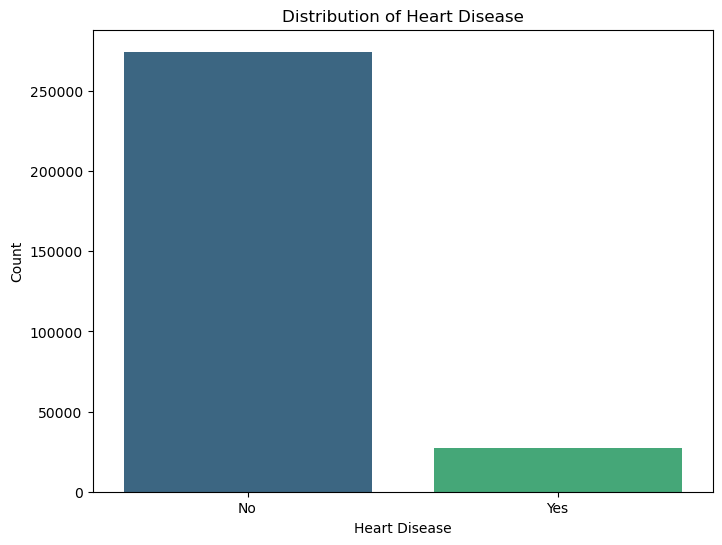

In [14]:
#Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease',data = df_cleaned_no_duplicates, palette='viridis')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [24]:
column_names = df.columns.tolist()
print(column_names)

['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


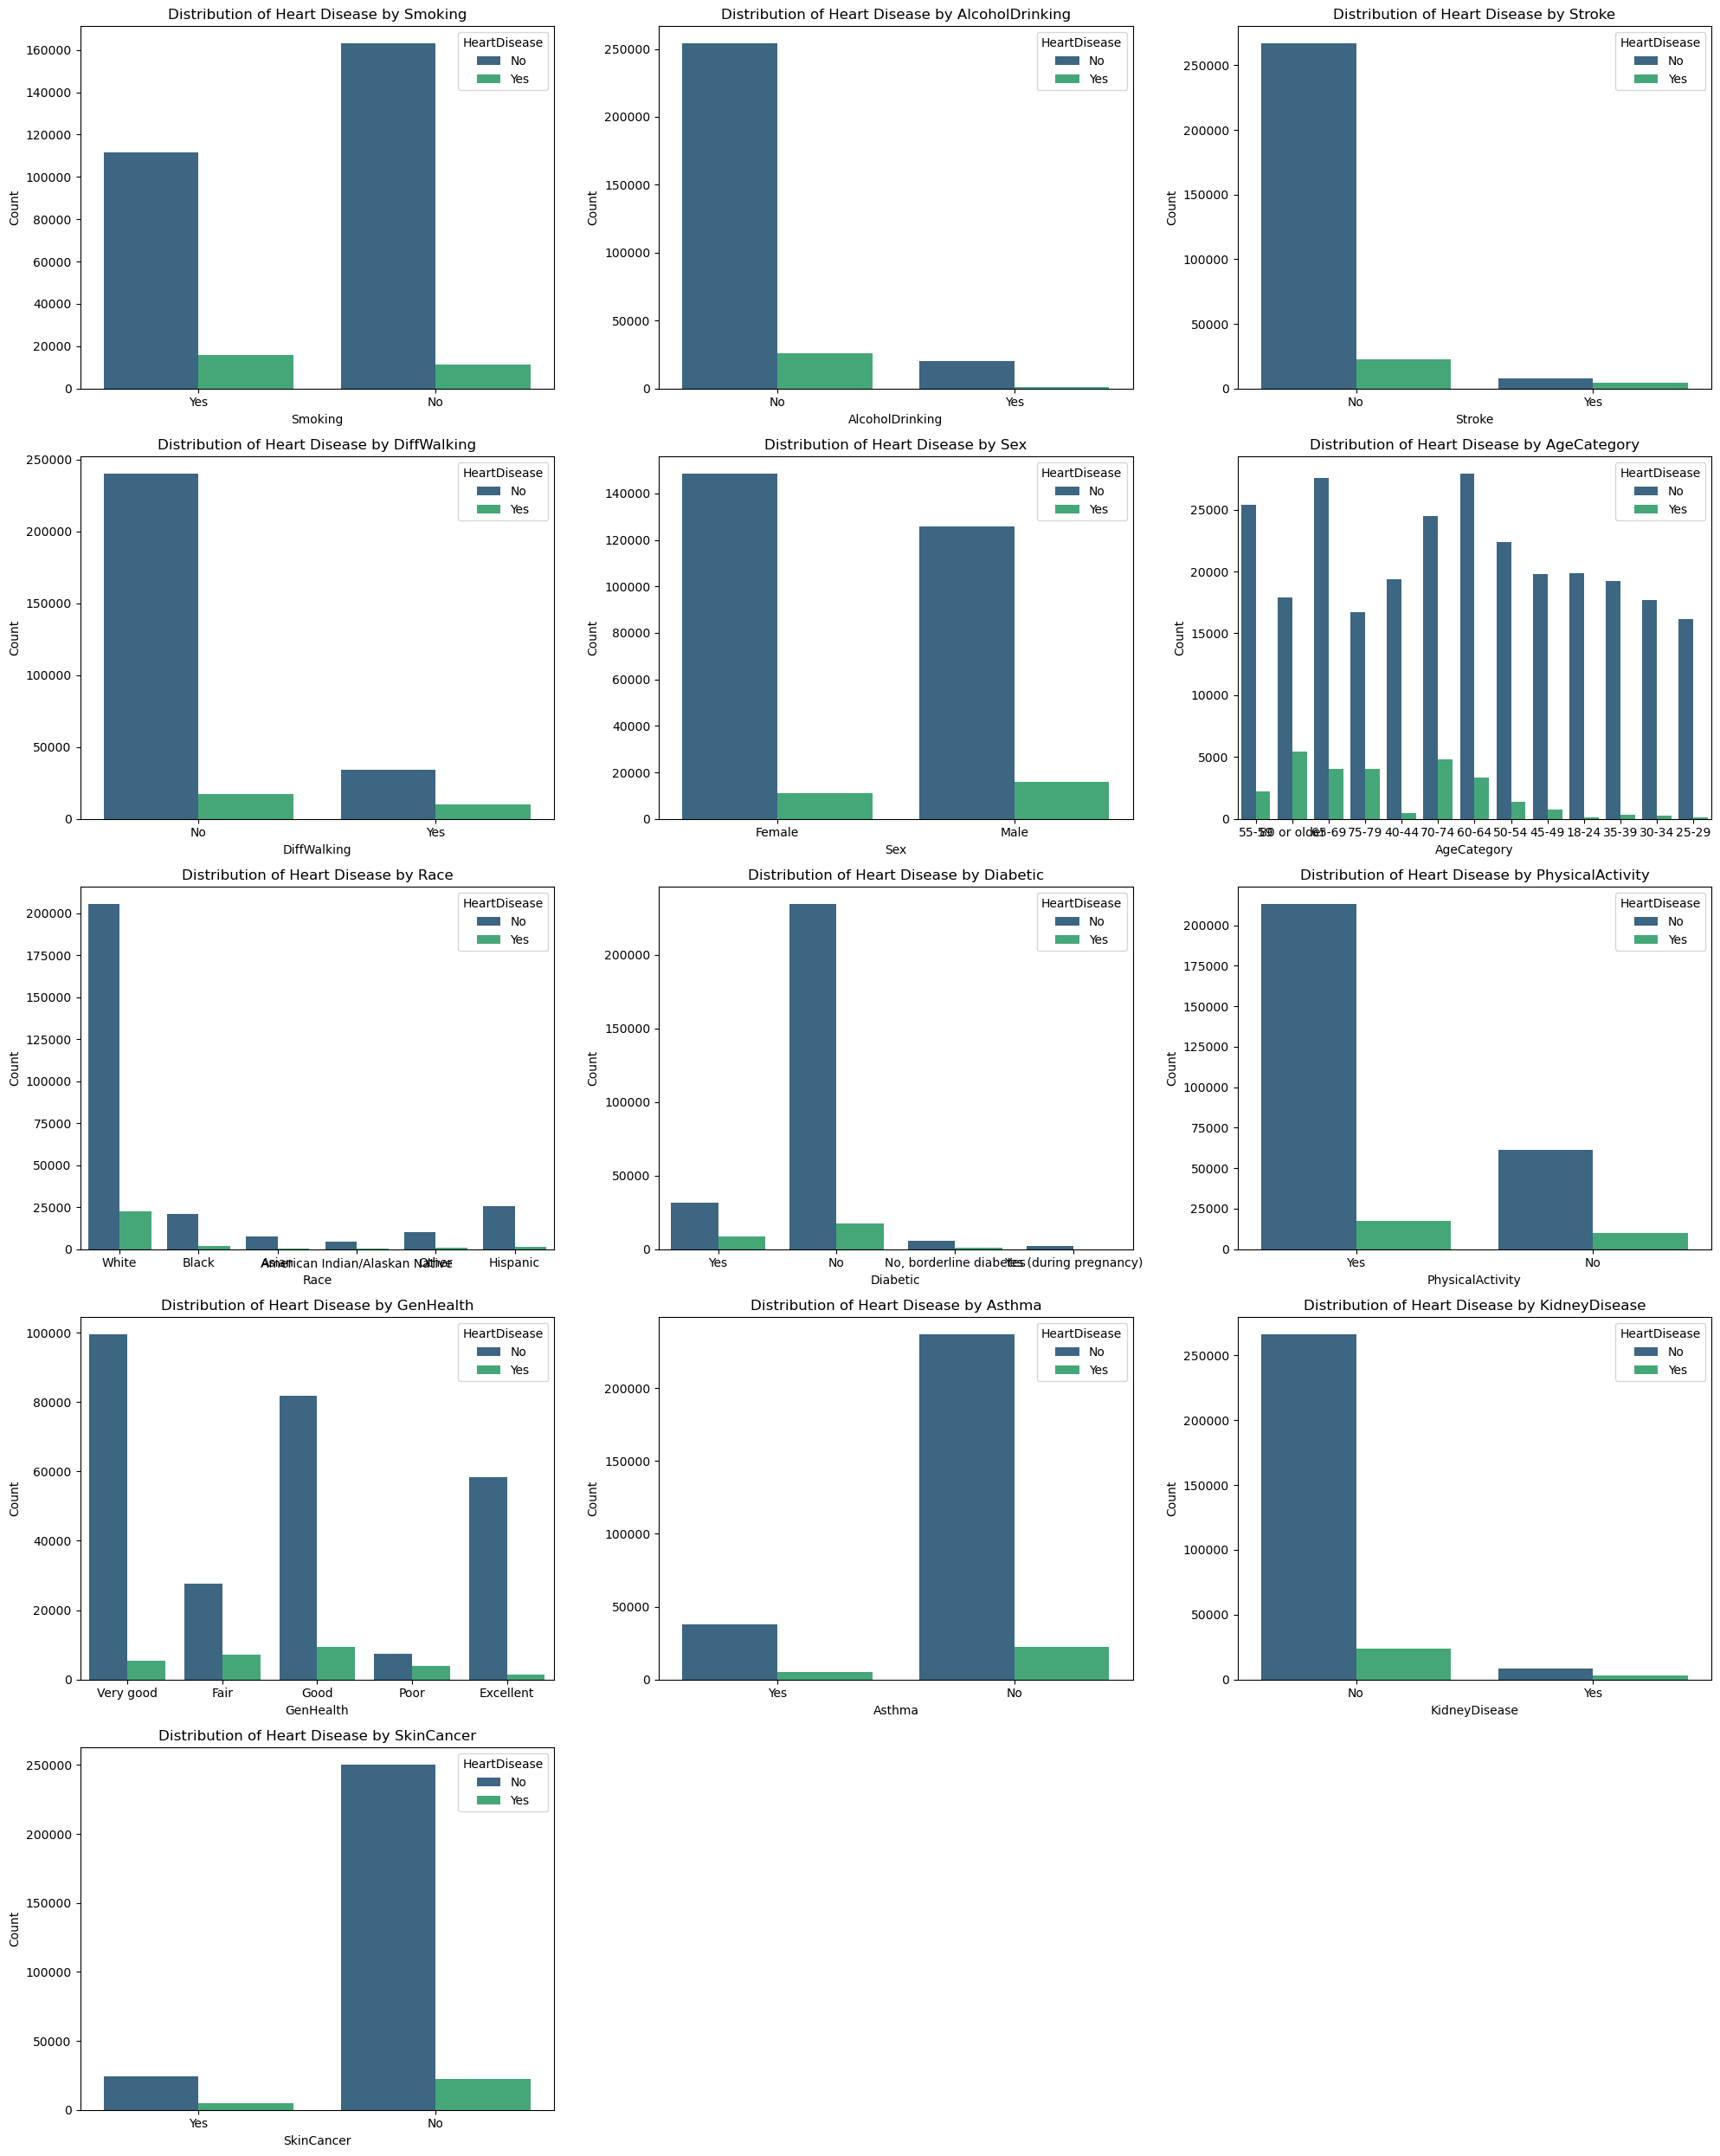

In [25]:
categorical_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 
    'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

plt.figure(figsize =(20, 25))

# Loop through categorical features and create subplots
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x=feature, hue='HeartDisease', data= df_cleaned_no_duplicates,  palette='viridis')
    plt.title(f'Distribution of Heart Disease by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [26]:
# Check unique categories in the 'Diabetic' column
unique_categories = df_cleaned_no_duplicates['Diabetic'].unique()
print("Unique categories in the 'Diabetic' Column before replacement:")
print(unique_categories)

Unique categories in the 'Diabetic' Column before replacement:
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']


In [27]:
# Replace values in the 'Diabetic' column
df_cleaned_no_duplicates.loc[:, 'Diabetic']  = df_cleaned_no_duplicates['Diabetic'].replace({
    'Yes (during pergency)': 'Yes',
    'No, borderline diabetes': 'No'
})


In [28]:
# Verify the replacement
unique_categories_after = df_cleaned_no_duplicates['Diabetic'].unique()
print("\nUnique categories in the 'Diabetic' column after replacement:")
print(unique_categories_after)


Unique categories in the 'Diabetic' column after replacement:
['Yes' 'No' 'Yes (during pregnancy)']


### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [29]:
df_cleaned_no_duplicates.loc[:,'HeartDisease'] = df_cleaned_no_duplicates['HeartDisease'].replace({
    'No':0,
    'Yes':1
})
print(df_cleaned_no_duplicates['HeartDisease'])

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 301717, dtype: object


### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [50]:
#Define columns to label encode
object_type_variables = [i for i in df_cleaned_no_duplicates[["AgeCategory", "Race", "GenHealth"]] if df_cleaned_no_duplicates.dtypes[i] == object]
object_type_variables

le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))
        df[i] = q
        df[i] = df[i].astype(int)
encoder(df)

In [52]:
df_cleaned_no_duplicates = pd.get_dummies(df_cleaned_no_duplicates, drop_first = True)

In [53]:
df.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,7,5,Yes,Yes,4,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,12,5,No,Yes,4,7.0,No,No,No


In [78]:
le = LabelEncoder()

# Apply label encoding to each boolean column
for column in bool_columns:
    df_cleaned_no_duplicates[column] = le.fit_transform(df_cleaned_no_duplicates[column])

# Check the updated DataFrame
print(df_cleaned_no_duplicates.head())

     BMI  PhysicalHealth  MentalHealth  SleepTime  HeartDisease_1  \
0  16.60             3.0          30.0        5.0               0   
1  20.34             0.0           0.0        7.0               0   
2  26.58            20.0          30.0        8.0               0   
3  24.21             0.0           0.0        6.0               0   
4  23.71            28.0           0.0        8.0               0   

   Smoking_Yes  AlcoholDrinking_Yes  Stroke_Yes  DiffWalking_Yes  Sex_Male  \
0            1                    0           0                0         0   
1            0                    0           1                0         0   
2            1                    0           0                0         1   
3            0                    0           0                0         0   
4            0                    0           0                1         0   

   ...  Diabetic_Yes  Diabetic_Yes (during pregnancy)  PhysicalActivity_Yes  \
0  ...             1                 

### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [81]:
X = df_cleaned_no_duplicates.drop('HeartDisease_1', axis=1)
y = df_cleaned_no_duplicates['HeartDisease_1']

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (241373, 36)
Shape of X_test:  (60344, 36)
Shape of y_train:  (241373,)
Shape of y_test:  (60344,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [83]:

numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

# Initialize StandardScaler
ss = StandardScaler()

X_train[numeric_columns] = ss.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = ss.transform(X_test[numeric_columns])

X_train.head(2)

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_1,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
197559,-1.772711,-0.438978,-0.261210,-0.056599,1.170104,-0.277732,-0.204103,-0.416009,-0.944125,-0.238957,...,-0.39485,-0.09221,0.556925,-0.36025,-0.659378,-0.196858,1.372348,-0.405732,-0.201879,-0.327647
286926,1.656946,-0.438978,-0.507246,0.624938,-0.854625,-0.277732,-0.204103,-0.416009,-0.944125,-0.238957,...,-0.39485,-0.09221,-1.795575,-0.36025,-0.659378,-0.196858,1.372348,-0.405732,-0.201879,-0.327647


In [84]:
X_test.head(2)

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_1,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
284798,1.105171,-0.438978,-0.261210,0.624938,-0.854625,-0.277732,-0.204103,2.403796,-0.944125,-0.238957,...,-0.394850,-0.09221,0.556925,-0.36025,-0.659378,-0.196858,1.372348,-0.405732,-0.201879,-0.327647
206219,-0.098841,-0.438978,-0.507246,0.624938,-0.854625,-0.277732,-0.204103,-0.416009,1.059182,-0.238957,...,2.532605,-0.09221,0.556925,-0.36025,1.516580,-0.196858,-0.728678,2.464681,-0.201879,-0.327647


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [85]:
def fit_n_print(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    return accuracy

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [88]:
# Define individual classifiers
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

# Create a list of estimators
estimators = [('rf', rf), ('knn', knn), ('gb', gb), ('adb', adb), ('lr', lr), ('nb', nb), ('dt', dt)]

# Define the StackingClassifier
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

In [ ]:
# Create a DataFrame to store the results
result = pd.DataFrame(columns=['Accuracy'])

# Iterate over the models and store the results
for model, model_name in zip([lr, nb, dt, rf, adb, gb, sc, knn], 
                             ['Logistic Regr', 'Naive Bayes', 'Decision tree', 'Random Forest', 'Adaboost', 'GradientBoost', 'Stacking', 'KNeighbors']):
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)
print(result)

### Conclusion

Based on the analysis of the heart_2020_cleaned dataset, here are the conclusions drawn:

1) Model Performance:

    a)Random Forest, Gradient Boosting, and Stacking Classifier demonstrated the highest accuracy scores among the models evaluated.                    
    b)Logistic Regression, Naive Bayes, and Decision Tree models exhibited relatively lower accuracy scores.                                            
    c)The Logistic Regression model encountered convergence issues, indicating the need for further tuning or preprocessing steps to address this issue effectively.

2)Stacking Classifier:

    a)The Stacking Classifier, which combines predictions from multiple base models, showed promising performance and often outperformed individual models.
    b)Stacking Classifier's superior performance suggests the effectiveness of model ensemble techniques in improving predictive accuracy.

3)Data Preprocessing:

    a)It's essential to conduct thorough data preprocessing steps, including handling missing values, encoding categorical variables, and scaling numerical features properly.
    b)Addressing any outliers or skewness in the data could further enhance model performance.
    
4)Model Tuning:

    a)Perform hyperparameter tuning for individual models to optimize their performance further.
    b)Adjusting parameters such as the number of estimators, learning rate, or maximum depth can significantly impact the performance of ensemble models like Random Forest and Gradient Boosting.

5)Convergence Issues:

    a)Address convergence issues with the Logistic Regression model by scaling the data, trying different solvers, performing feature selection, checking for multicollinearity, and adding regularization.

6)Future Steps:

    a)Conduct further analysis to understand the impact of different features on the target variable and refine feature selection accordingly.
    b)Experiment with different ensemble techniques and combinations of base models to explore potential performance improvements.
    c)Continuously monitor and update the model as new data becomes available to ensure its effectiveness over time.

----
## Happy Learning:)
----